In [2]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

In [3]:
# scipy for algorithms
import scipy
from scipy import stats

In [4]:
# pymc3 for Bayesian Inference, pymc built on t
import pymc3 as pm
import theano.tensor as tt
import scipy
from scipy import optimize

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [26]:
# matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib
# Number of samples for Markov Chain Monte Carlo
N_SAMPLES = 5000

In [6]:
data = pd.read_csv('C:/Users/User/OneDrive - hawk.iit.edu/Lectures IIT/Bayseian/Project/sleeping-alone-data1.csv')

In [7]:
data = data.iloc[1:]

In [8]:
data = data[['StartDate','EndDate']]

In [9]:
data[['StartDate','EndDate']] = data[['StartDate','EndDate']].apply(pd.to_datetime)

In [10]:
data = pd.DataFrame(data) 

In [11]:
data['date'] = [d.date() for d in data['StartDate']]
data.set_index("date", inplace = True) 

In [12]:
data.head()

,StartDate,EndDate
date,,
2014-07-10,2014-07-10 18:37:00,2014-07-10 18:39:00
2014-07-10,2014-07-10 15:54:00,2014-07-10 15:56:00
2014-07-10,2014-07-10 15:44:00,2014-07-10 15:49:00
2014-07-10,2014-07-10 13:47:00,2014-07-10 13:47:00
2014-07-10,2014-07-10 13:13:00,2014-07-10 13:14:00


In [13]:
# Create a separate sleep dataframe
sleep_index = pd.date_range(start=min(data.index), end=max(data.index), freq='60S')
sleep_index = [time for time in sleep_index if (time.hour >= 21) & (time.hour <= 23)]
sleep_data = pd.DataFrame(0, columns=['indicator'], index=sleep_index)

# Set an index with an indicator for times when I am asleep
# Indicator = 1 when I am asleep, else 0
for time in sleep_data.index:
    for sleep_time in data['StartDate']:
        if time == sleep_time:
            selected_date = time.date()
            date_subset = [date for date in sleep_data.index if date.date() == selected_date]
            asleep_times = [time for time in date_subset if time.time() >= sleep_time.time()]
            sleep_data.ix[asleep_times, 'indicator'] = 1
            
# Create a separate wake dataframe
wake_index=pd.date_range(start=min(data.index), end=max(data.index), freq='60S')
wake_index = [time for time in wake_index if (time.hour <= 7) & (time.hour >= 5)]
wake_data = pd.DataFrame(1, columns=['indicator'], index=wake_index)

# Set an index with indicator for times when I am asleep
# Indicator = 1 when I am asleep, else 0
for time in wake_data.index:
    for wake_time in data['EndDate']:
        if time == wake_time:
            selected_date = time.date()
            date_subset = [date for date in wake_data.index if date.date() == selected_date]
            wake_times = [time for time in date_subset if time.time() >= wake_time.time()]
            wake_data.ix[wake_times, 'indicator'] = 0
    
# Time offset column 
# For sleep, offset from 10:00 PM
sleep_data['time_offset'] = [int((time.hour * 60 + time.minute) - (22 * 60)) for time in sleep_data.index]
# For wake, offset from 6:00 AM
wake_data['time_offset'] = [int((time.hour * 60 + time.minute) - (6 * 60)) for time in wake_data.index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [14]:
sleep_data.to_csv('C:/Users/User/OneDrive - hawk.iit.edu/Lectures IIT/Bayseian/Project/sleep_data.csv')
wake_data.to_csv('C:/Users/User/OneDrive - hawk.iit.edu/Lectures IIT/Bayseian/Project/wake_data.csv')

In [15]:
# Data formatted in different notebook
sleep_data = pd.read_csv('C:/Users/User/OneDrive - hawk.iit.edu/Lectures IIT/Bayseian/Project/sleep_data.csv')
wake_data = pd.read_csv('C:/Users/User/OneDrive - hawk.iit.edu/Lectures IIT/Bayseian/Project/wake_data.csv')

# Labels for plotting
sleep_labels = ['9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00']
wake_labels = ['5:00', '5:30', '6:00', '6:30', '7:00', '7:30', '8:00']

Falling Asleep Data


Each dot represents one observation at a specific time with the color intensity corresponding to the number of points at that time. We can see that I tend to fall asleep a little after 10:00 PM.

In [16]:
print('Number of sleep observations %d' % len(sleep_data))

Number of sleep observations 180


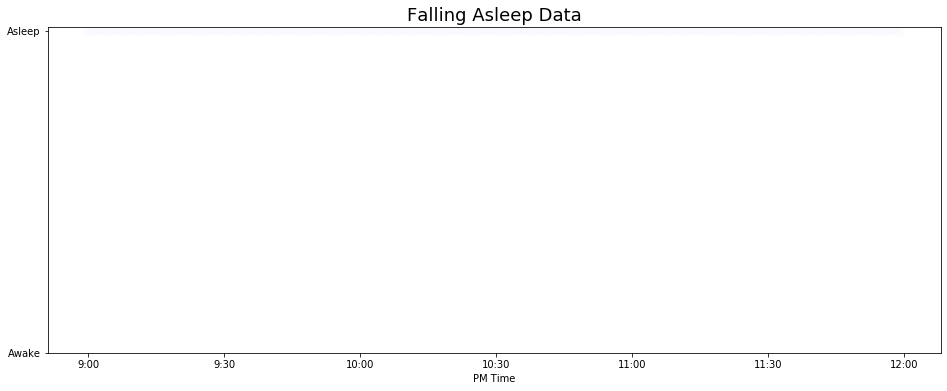

In [17]:
figsize(16, 6)

# Sleep data
plt.scatter(sleep_data['time_offset'], sleep_data['indicator'], 
            s= 60, alpha=0.01, facecolor = 'b', edgecolors='b')
plt.yticks([0, 1], ['Awake', 'Asleep']); plt.xlabel('PM Time'); 
plt.title('Falling Asleep Data', size = 18)
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels);

Waking Up Data


My alarm is set for 6:00 AM every day of the week, and the wake data is more consistent than the sleep data. I nearly always wake up within a 10 minute window around 6:00 AM.

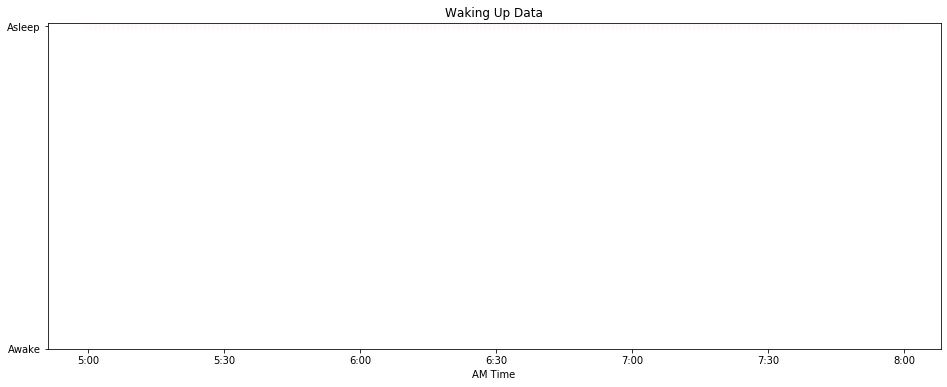

In [18]:
# Wake data
plt.scatter(wake_data['time_offset'], wake_data['indicator'], 
            s= 50, alpha = 0.01, facecolor='r', edgecolors =  'r');
plt.yticks([0, 1], ['Awake', 'Asleep']); plt.xlabel('AM Time');
plt.title('Waking Up Data')
plt.xticks([-60, -30, 0, 30, 60, 90, 120], wake_labels);


Logistic Function to Represent Transition


We need to decide on a function to represent the transition from being awake to sleeping. There are a number of acceptable models, and here we will assume this transition can be modeled as a logistic function. A logistic function (also called a sigmoid) is a non-linear function bounded between 0 and 1. As ${t \to -\infty}, {p(s|t) \to 0}$ and, as ${t \to +\infty}, {p(s|t) \to 1}$. The expression for a logistic probability distribution for sleep as a function of time is:

$$p(s|t) = \frac{1}{ 1 + e^{\;\beta t } }$$
The $\beta$ parameter is unknown and be esimated using Markov Chain Monte Carlo sampling. MCMC samples from the prior for each parameter, trying to maximize the probabilty of the parameter given the data.

Several logistic functions with various $\beta$ parameters are shown below:

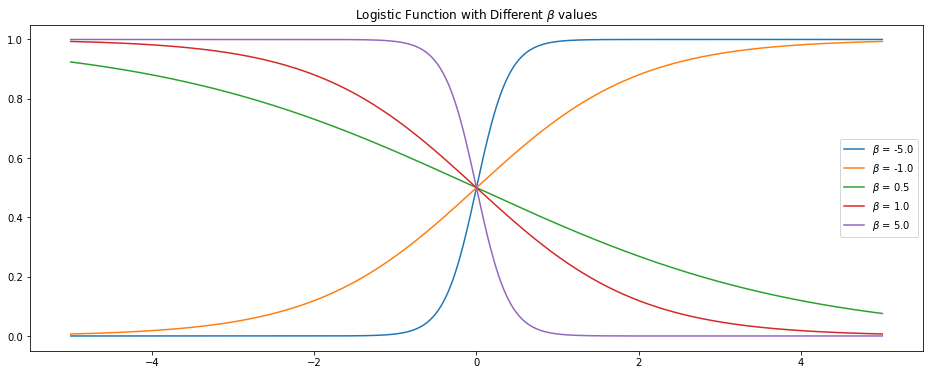

In [19]:
figsize(16, 6)

# Logistic function with only beta
def logistic(x, beta):
    return 1. / (1. + np.exp(beta * x))

# Plot examples with different betas 
x = np.linspace(-5, 5, 1000)
for beta in [-5, -1, 0.5, 1, 5]:
    plt.plot(x, logistic(x, beta), label = r"$\beta$ = %.1f" % beta)

plt.legend();
plt.title(r'Logistic Function with Different $\beta$ values');


There is one problem with the basic logistic function as shown above: the transition is centered at 0. However, in my sleeping data, the transition is around 10:00 pm for sleeping and 6:00 am for waking. We address this by adding an offset, called a bias, to adjust the location of the logistic function. The logistic function now is:

$$p(t) = \frac{1}{ 1 + e^{\;\beta t + \alpha} }$$
This introduces another unknown parameter, $\alpha$, which we will also find from Markov Chain Monte Carlo.

The logistic function with various $\alpha$ and $\beta$ parameters is shown below.

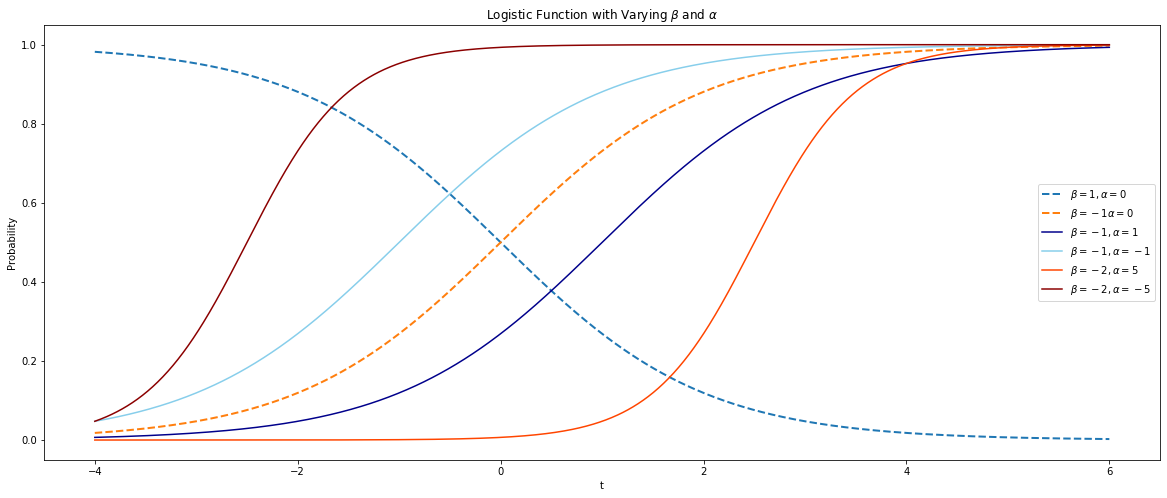

In [20]:
figsize(20, 8)

# Logistic function with both beta and alpha
def logistic(x, beta, alpha=0):
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

x = np.linspace(-4, 6, 1000)

plt.plot(x, logistic(x, beta=1), label=r"$\beta = 1, \alpha = 0$", ls="--", lw=2)
plt.plot(x, logistic(x, beta=-1), label=r"$\beta = -1 \alpha = 0$", ls="--", lw=2)

plt.plot(x, logistic(x, -1, 1), 
         label=r"$\beta = -1, \alpha = 1$", color="darkblue")
plt.plot(x, logistic(x, -1, -1),
         label=r"$\beta = -1, \alpha = -1$",color="skyblue")
plt.plot(x, logistic(x, -2, 5), 
         label=r"$\beta = -2, \alpha = 5$", color="orangered")
plt.plot(x, logistic(x, -2, -5), 
         label=r"$\beta = -2, \alpha = -5$", color="darkred")
plt.legend(); plt.ylabel('Probability'); plt.xlabel('t')
plt.title(r'Logistic Function with Varying $\beta$ and $\alpha$');


$\beta$ shifts the direction and steepness of the curve, while $\alpha$ changes the location. We will use MCMC to find the most likely value of these parameters under the data.

Prior Distribution for $\beta$ and $\alpha$
We have no evidence to suggest what the prior distributions for the model parameters $\beta$ and $\alpha$ are ahead of time. Therefore, we can model them as if they came from a normal distribution. The normal, or Gaussian, distribution is defined by the mean, $\mu$, and the precision, $\tau$. The precision is the reciprocal of the standard deviation, $\sigma$. The mean defines the location of the distribution and the precision shows the spread. A larger value of $\tau$ indicates the data is less spread out (it is more precise) and hence the variation is smaller. The mean can be either positive or negative, but the precision will always be positive. A normal distribution as defined here is represented as:

$$ f(x | \mu, \tau) = \sqrt{\frac{\tau}{2\pi}} \exp\left( -\frac{\tau}{2} (x - \mu)^2 \right) $$
Probability density functions for three normal distributions are shown below.

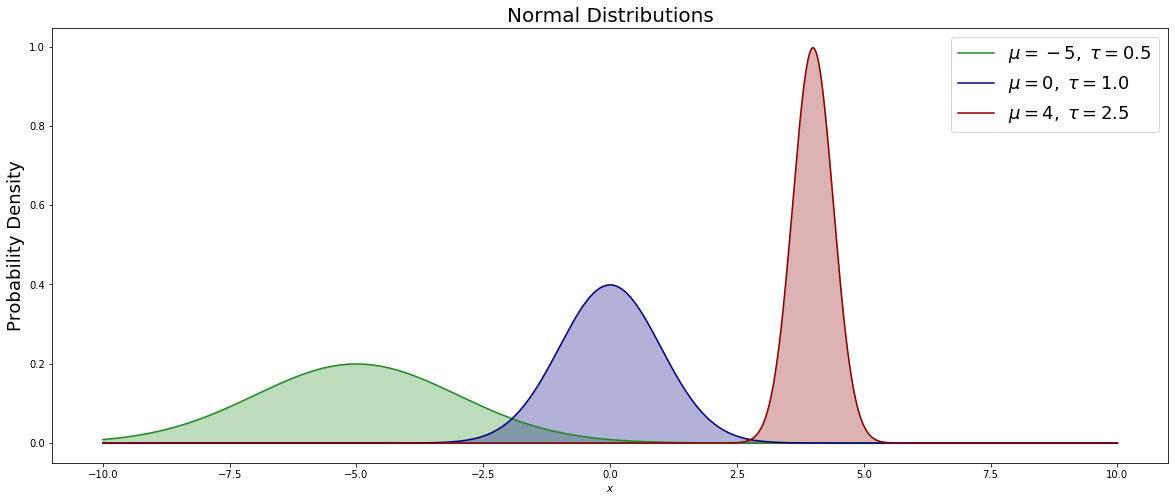

In [22]:
figsize(20, 8)
# Set up the plotting parameters
nor = stats.norm 
x= np.linspace(-10, 10, 1000)
mu = (-5, 0, 4)
tau = (0.5, 1, 2.5)
colors = ("forestgreen", "navy", "darkred")

# Plot 3 pdfs for different normal distributions
params = zip(mu, tau, colors)
for param in params:
    y = nor.pdf(x, loc = param[0], scale = 1 / param[1])
    plt.plot(x, y, 
             label="$\mu = %d,\;\\tau = %.1f$" % (param[0], param[1]), 
             color = param[2])
    plt.fill_between(x, y, color = param[2], alpha = 0.3)
    
plt.legend(prop={'size':18});
plt.xlabel("$x$")
plt.ylabel("Probability Density", size = 18)
plt.title("Normal Distributions", size = 20);

Parameter Search Space

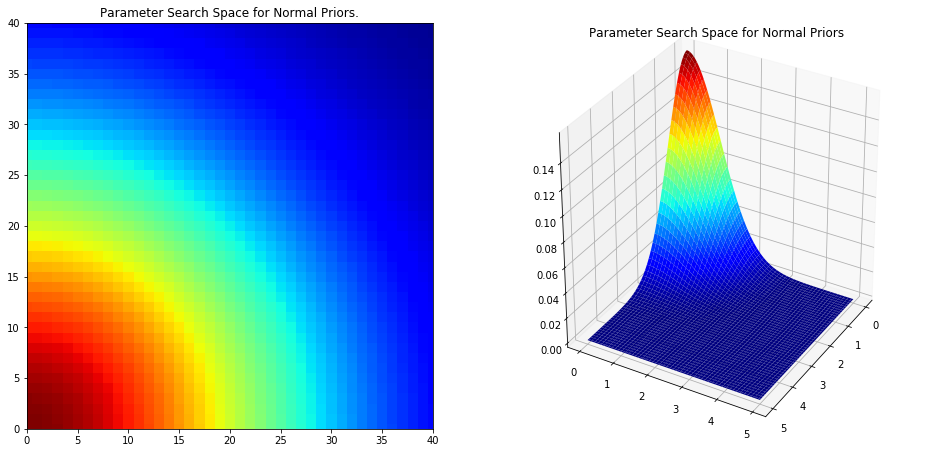

In [23]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(16, 8)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

jet = plt.cm.jet
fig = plt.figure()
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
norm_x = stats.norm.pdf(x, loc=0, scale=1)
norm_y = stats.norm.pdf(y, loc=0, scale=1)
M = np.dot(norm_x[:, None], norm_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
                cmap=jet)

plt.xlim(0, 40)
plt.ylim(0, 40)
plt.title("Parameter Search Space for Normal Priors.")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet)
ax.view_init(azim=390)
plt.title("Parameter Search Space for Normal Priors");

The expected value of a normal distribution is the mean.$$ E[ X | \mu, \tau] = \mu$$

The variance of a normal distribution is equal to:

$$ Var[ X | \mu, \tau) = \frac{1}{\tau}$$
Again, we have no assumptions about the value for either $\mu$ or $\tau$ in the prior distributions for $\alpha$ and $\beta$. When we initialize the model, we can use $\mu = 0$ and a relatively large variance such as $\tau = 0.05$. Markov Chain Monte Carlo will samples values of $\mu$ and $\tau$ that try to maximize the likelihood of $\alpha$ and $\beta$ under the data.

Markov Chain Monte Carlo
Markov Chain Monte Carlo will sample both $\beta$ and $\alpha$ from two normal distributions to find the parameters. Each iteration (state), an estimate for both $\beta$ and $\alpha$ are drawn from the prior. If the parameters increase the probabilty of the data, the state is accepted, but if the parameters are not in agreement with the data, the state is rejected. Monte Carlo refers to the sampling part of the algorithm. Markov Chain means that the next state is only dependent on the current state in a first order process (second order depends on the current and 1 previous step, third order on the current and 2 previous steps and so on). MCMC will return every sample of the parameters for the number of specified steps. This is known as the model trace. To find the most likely parameters, we can take the average of the samples in the trace. MCMC does not given an exact answer, but rather tries to find the maximum likelihood states under the data.

When modeling with MCMC up to 50% of the initial steps, referred to as the burn-in part of the trace, are discarded because the algorithm returns more likely parameters as the number of samples increases. The initial samples are less likely than the latter samples on average. There are a number of methods to test for convergence of MCMC, including visually inspecting the trace, and calculating the auto-correlation of the trace (a lower auto-correlation is an indicator of convergence). We will look at the trace in this example, but will not take rigorous steps to address convergence. There are also a number of methods to choose a smart starting value for the Markov Chain such as Maximum A Posterior estimation. Choosing an intelligent initial value can speed up convergence.

Posterior Probability of Sleep given Time
We have all the pieces for the poesterior probabilty and can now put them together. The logistic function describes the transition from awake to asleep, but we do not konw the parameters $\beta$ and $\alpha$. The aim is to find the parameters of the logistic function which maximize the likelihood of the observed data. The parameters are assumed to come from a normal distribution defined by a mean, $\mu$ and a variance, $\tau$. The MCMC algorithm will sample values of $\mu$ and $\tau$ for both $\alpha$ and $\beta$ to try and maximize the parameters of the logistic function given the data.

The data is connected to the parameters through a Bernoulli Variable.

Bernoulli Variable
A bernoulli variable is a discrete random variable that is either 0 or 1. In our example, we can model asleep or awake as a Bernoulli variable where awake is 0 and asleep is 1. The Bernoulli variable for sleep depends on the time, in a manner defined by the logistic function.

$$ \text{Sleep Probability, $S_i$} \sim \text{Ber}( \;p(t_i)\; ), \;\; i=1..N$$
$p(t_i)$ is the logistic function with the independent variable time, so this becomes:

$$ P(\text{sleep} | t_i) = \text{Ber}(\frac{1}{1 + e^{(\beta t_i + \alpha)}})$$
The goal of MCMC is to find the $\alpha$ and $\beta$ parameters using the data and assuming normal priors.

PyMC3 Model
We are using a powerful Bayesian Inference library in Python called PyMC3. This library has features for running Markov Chain Monte Carlo and other inference algorithms. This report does not detail PyMC3, but a great book for getting started is Probabilistic Programming and Bayesian Methods for Hackers by Cameron Davidson-Pilon which is available for free on GitHub

The following code creates the model and performs MCMC, drawing N_SAMPLES number of samples for $\beta$ and $\alpha$. The specific sampling algorithm is Metropolic Hastings. We feed in the data and tell the model it is observations of the Bernoulli variable. The model then tries to maximize the parameters under the data.

In [24]:
# Sort the values by time offset
sleep_data.sort_values('time_offset', inplace=True)

# Time is the time offset
time = np.array(sleep_data.loc[:, 'time_offset'])

# Observations are the indicator
sleep_obs = np.array(sleep_data.loc[:, 'indicator'])

In [27]:
with pm.Model() as sleep_model:
    # Create the alpha and beta parameters
    alpha = pm.Normal('alpha', mu=0.0, tau=0.01, testval=0.0)
    beta = pm.Normal('beta', mu=0.0, tau=0.01, testval=0.0)
    
    # Create the probability from the logistic function
    p = pm.Deterministic('p', 1. / (1. + tt.exp(beta * time + alpha)))
    
    # Create the bernoulli parameter which uses the observed dat
    observed = pm.Bernoulli('obs', p, observed=sleep_obs)
    
    # Starting values are found through Maximum A Posterior estimation
    # start = pm.find_MAP()
    
    # Using Metropolis Hastings Sampling
    step = pm.Metropolis()
    
    # Sample from the posterior using the sampling method
    sleep_trace = pm.sample(N_SAMPLES, step=step, njobs=2);

ValueError: Unused step method arguments: {'njobs'}